# Importing libraries

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from pandas.api.types import is_numeric_dtype
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import plot_tree


import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


from IPython.core import display as ICD
from math import ceil
from scipy import stats

data = pd.read_csv('jobs_in_data_2024.csv')
df = pd.DataFrame(data)

## We start by extracting the specific data we want where we drop those that occupies a small proportion of the data. 

In [3]:
data =  {'experience_level':['Entry-level', 'Executive', 'Mid-level', 'Senior'], 'employment_type':['Contract', 'Freelance', 'Full-time', 'Part-time'], 'company_size':['L', 'M', 'S'], 'company_location':['Algeria','American Samoa','Andorra','Argentina','Armenia','Australia','Austria','Bahamas','Belgium','Bosnia and Herzegovina','Brazil','Canada','Central African Republic','China','Colombia','Croatia','Czechia','Denmark','Ecuador','Egypt','Estonia','Finland','France','Germany','Ghana','Gibraltar','Greece','Honduras','Hungary','India','Indonesia','Iran, Islamic Republic of','Iraq','Ireland','Israel','Italy','Japan','Kenya','Korea, Republic of','Latvia','Lebanon','Lithuania','Luxembourg','Malaysia','Malta','Mauritius','Mexico','Moldova, Republic of','Netherlands','New Zealand','Nigeria','Oman','Pakistan','Philippines','Poland','Portugal','Puerto Rico','Qatar','Romania','Russian Federation','Saudi Arabia','Singapore','Slovenia','South Africa','Spain','Sweden','Switzerland','T√ºrkiye','Thailand','Ukraine','United Arab Emirates','United Kingdom','United States','Viet Nam'],'job_category':['BI and Visualization','Cloud and Database','Data Analysis','Data Architecture and Modeling','Data Engineering','Data Management and Strategy','Data Quality and Operations','Data Science and Research','Leadership and Management','Machine Learning and AI'],'work_setting':['Hybrid','In-person','Remote']}

df = df[df['experience_level']!= 'Executive']
df = df[(df['employment_type'] != 'Contract') & (df['employment_type'] != 'Freelance') & (df['employment_type'] != 'Part-time')]
df = df[df['company_size'] != 'S']
df = df[df['company_location'] == 'United States']
df = df[(df['job_category'] != 'Cloud and Database') & (df['job_category'] != 'Data Management and Strategy') & (df['job_category']!= 'Data Quality and Operations') & (df['job_category'] != 'Data Architecture and Modeling')]
df = df[df['work_setting'] != 'Hybrid']

## Next, we drop the unnecessary columns that are not variables which we want to analyse.

In [4]:
df = df.drop(columns = ['salary', 'salary_currency','employee_residence','company_location','employment_type'])
print(df)

       work_year experience_level                 job_title  salary_in_usd  \
7           2024      Entry-level           Insight Analyst          50000   
8           2024      Entry-level           Insight Analyst          40000   
9           2024           Senior             Data Engineer         276000   
10          2024           Senior             Data Engineer         148000   
11          2024           Senior        Research Scientist         234000   
...          ...              ...                       ...            ...   
14186       2020        Mid-level            Data Scientist         118000   
14187       2020        Mid-level            Data Scientist         138350   
14188       2020        Mid-level             Data Engineer         130800   
14195       2020           Senior            Data Scientist         412000   
14196       2021        Mid-level  Principal Data Scientist         151000   

      work_setting company_size               job_category  
7 

## Next, we check for any null values in each variable so that we can remove them.

In [5]:
print (df.isnull().sum())

work_year           0
experience_level    0
job_title           0
salary_in_usd       0
work_setting        0
company_size        0
job_category        0
dtype: int64


In [6]:
df.head()

,work_year,experience_level,job_title,salary_in_usd,work_setting,company_size,job_category
7,2024,Entry-level,Insight Analyst,50000,Remote,M,Data Analysis
8,2024,Entry-level,Insight Analyst,40000,Remote,M,Data Analysis
9,2024,Senior,Data Engineer,276000,In-person,M,Data Engineering
10,2024,Senior,Data Engineer,148000,In-person,M,Data Engineering
11,2024,Senior,Research Scientist,234000,In-person,M,Data Science and Research


In [7]:
print(df.to_string(index=False))

 work_year experience_level                                job_title  salary_in_usd work_setting company_size              job_category
      2024      Entry-level                          Insight Analyst          50000       Remote            M             Data Analysis
      2024      Entry-level                          Insight Analyst          40000       Remote            M             Data Analysis
      2024           Senior                            Data Engineer         276000    In-person            M          Data Engineering
      2024           Senior                            Data Engineer         148000    In-person            M          Data Engineering
      2024           Senior                       Research Scientist         234000    In-person            M Data Science and Research
      2024           Senior                       Research Scientist         146000    In-person            M Data Science and Research
      2024      Entry-level            Business 

## Next, we print out the different values for the quantiles, mean, etc.

In [8]:
df.describe()

,work_year,salary_in_usd
count,11430.000000,11430.000000
mean,2023.153456,156352.829396
std,0.626286,60597.725778
min,2020.000000,20000.000000
25%,2023.000000,112200.000000
50%,2023.000000,148000.000000
75%,2024.000000,190000.000000
max,2024.000000,450000.000000


## Next, we define the quantiles so that we can drop any outliers.

In [9]:
salary = df['salary_in_usd']
Q1 = df['salary_in_usd'].quantile(0.20)
Q3 = df['salary_in_usd'].quantile(0.80)
IQR = Q3 - Q1
outliers_salary = df[(df['salary_in_usd'] < (Q1 - 1.5 * IQR)) | (df['salary_in_usd'] > (Q3 + 1.5 * IQR))]

df = df.drop(outliers_salary.index)
df.shape

(11349, 7)

In [10]:
df.head()

,work_year,experience_level,job_title,salary_in_usd,work_setting,company_size,job_category
7,2024,Entry-level,Insight Analyst,50000,Remote,M,Data Analysis
8,2024,Entry-level,Insight Analyst,40000,Remote,M,Data Analysis
9,2024,Senior,Data Engineer,276000,In-person,M,Data Engineering
10,2024,Senior,Data Engineer,148000,In-person,M,Data Engineering
11,2024,Senior,Research Scientist,234000,In-person,M,Data Science and Research


## Then we print the new quantiles, mean, median,etc.

In [11]:
df.describe()

,work_year,salary_in_usd
count,11349.000000,11349.000000
mean,2023.152436,154699.407877
std,0.624963,57494.419409
min,2020.000000,20000.000000
25%,2023.000000,112000.000000
50%,2023.000000,147000.000000
75%,2024.000000,190000.000000
max,2024.000000,345400.000000


## # Bar Plot of Experience Levels

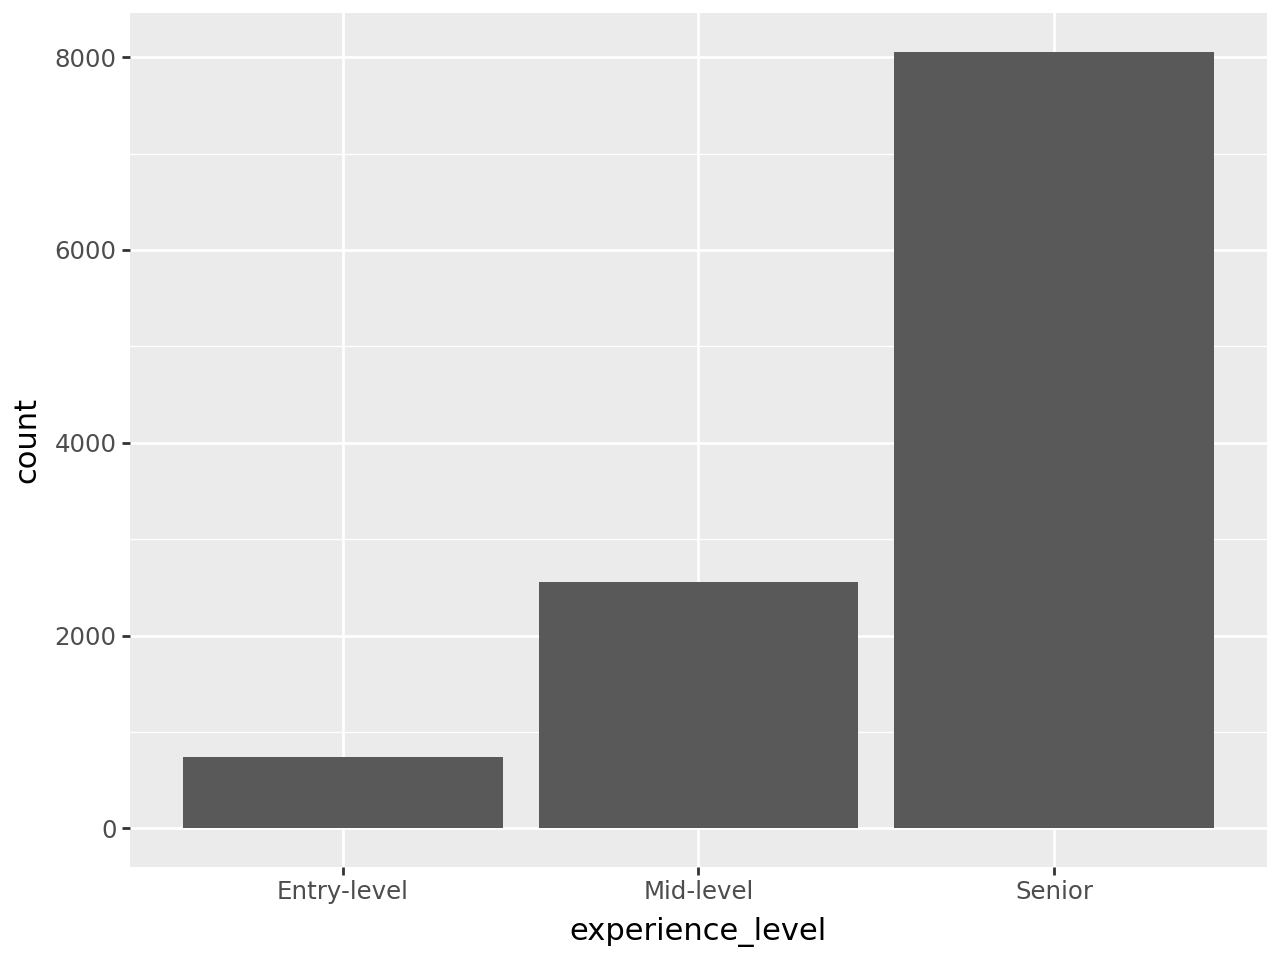

In [16]:
!pip install plotnine
from plotnine import ggplot, aes, geom_bar
ggplot(data=df) + geom_bar(mapping=aes(x='experience_level'))

## Pairwise Plots of All Numerical Features 

C:\Users\taman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\taman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\taman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight


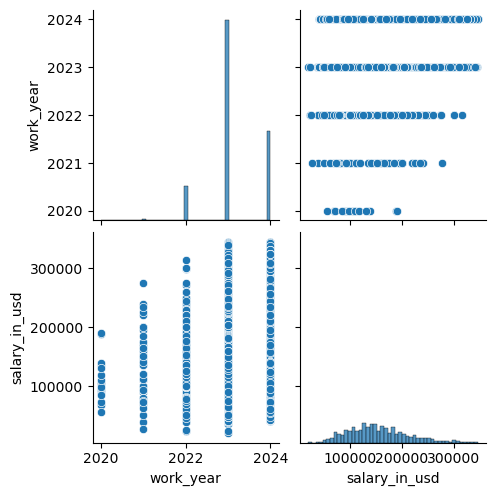

In [17]:
sb.pairplot(data = df)